# Import necessary modules

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

from numpy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt

from scipy import signal
from scipy.signal import find_peaks
from google.colab import files
import os.path


# Upload files (6 files in one time)

In [ ]:
filenames = list(files.upload())
display(filenames)

Saving X_Part1.csv to X_Part1.csv
Saving X_Part2.csv to X_Part2.csv
Saving X_Part3.csv to X_Part3.csv
Saving X_Part4.csv to X_Part4.csv
Saving X_Part5.csv to X_Part5.csv
Saving X_Part6.csv to X_Part6.csv


['X_Part1.csv',
 'X_Part2.csv',
 'X_Part3.csv',
 'X_Part4.csv',
 'X_Part5.csv',
 'X_Part6.csv']

# Display all graph

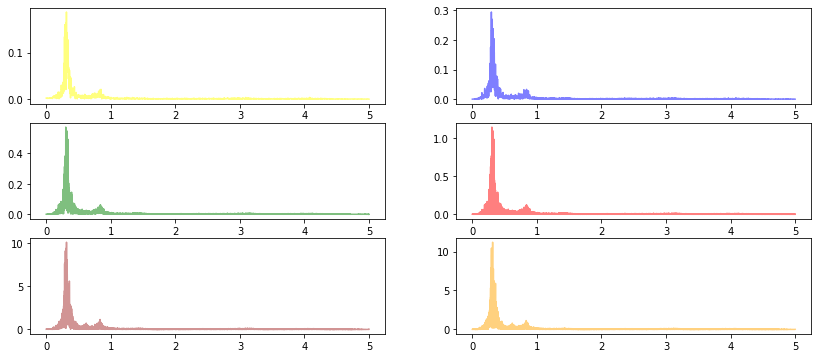

In [ ]:
#Dataset 1
t=pd.read_csv(filenames[0],usecols=[0])
a=pd.read_csv(filenames[0],usecols=[1])
n=len(a)
dt=0.1

#Dataset 2
t1=pd.read_csv(filenames[1],usecols=[0])
a1=pd.read_csv(filenames[1],usecols=[1])
n1=len(a1)
dt=0.1

#Dataset 3
t2=pd.read_csv(filenames[2],usecols=[0])
a2=pd.read_csv(filenames[2],usecols=[1])
n2=len(a2)
dt=0.1

#Dataset 4
t3=pd.read_csv(filenames[3],usecols=[0])
a3=pd.read_csv(filenames[3],usecols=[1])
n3=len(a3)
dt=0.1

#Dataset 5
t4=pd.read_csv(filenames[4],usecols=[0])
a4=pd.read_csv(filenames[4],usecols=[1])
n4=len(a4)
dt=0.1

#Dataset 6
t5=pd.read_csv(filenames[5],usecols=[0])
a5=pd.read_csv(filenames[5],usecols=[1])
n5=len(a5)

dt=0.1 #time increment in each data

#to convert DataFrame to 1D array
#acc value must be in numpy array format for half way mirror calculation

#Dataset1
acc=a.values.flatten() 
#Dataset2
acc1=a1.values.flatten()
#Dataset3
acc2=a2.values.flatten() 
#Dataset4
acc3=a3.values.flatten()
#Dataset5
acc4=a4.values.flatten() 
#Dataset6
acc5=a5.values.flatten()

#Convert data to FFT

#Dataset1
fft=rfft(acc)*dt
freq=rfftfreq(n,d=dt)
#Dataset2
fft1=rfft(acc1)*dt
freq1=rfftfreq(n1,d=dt)
#Dataset3
fft2=rfft(acc2)*dt
freq2=rfftfreq(n2,d=dt)
#Dataset4
fft3=rfft(acc3)*dt
freq3=rfftfreq(n3,d=dt)
#Dataset5
fft4=rfft(acc4)*dt
freq4=rfftfreq(n4,d=dt)
#Dataset6
fft5=rfft(acc5)*dt
freq5=rfftfreq(n5,d=dt)

#Plot Graph

FFT=abs(fft)
FFT1=abs(fft1)
FFT2=abs(fft2)
FFT3=abs(fft3)
FFT4=abs(fft4)
FFT5=abs(fft5)

plt.figure(figsize=(14,6))

plt.subplot(3,2,1)
data1 = plt.plot(freq,FFT,color='yellow', alpha=0.5)
plt.subplot(3,2,2)
data2 = plt.plot(freq1,FFT1,color='blue', alpha=0.5)
plt.subplot(3,2,3)
data3 = plt.plot(freq2,FFT2,color='green', alpha=0.5)
plt.subplot(3,2,4)
data4 = plt.plot(freq3,FFT3,color='red', alpha=0.5)
plt.subplot(3,2,5)
data5 = plt.plot(freq4,FFT4,color='brown', alpha=0.5)
plt.subplot(3,2,6)
data6 = plt.plot(freq5,FFT5,color='orange', alpha=0.5)



# Display merged Graph

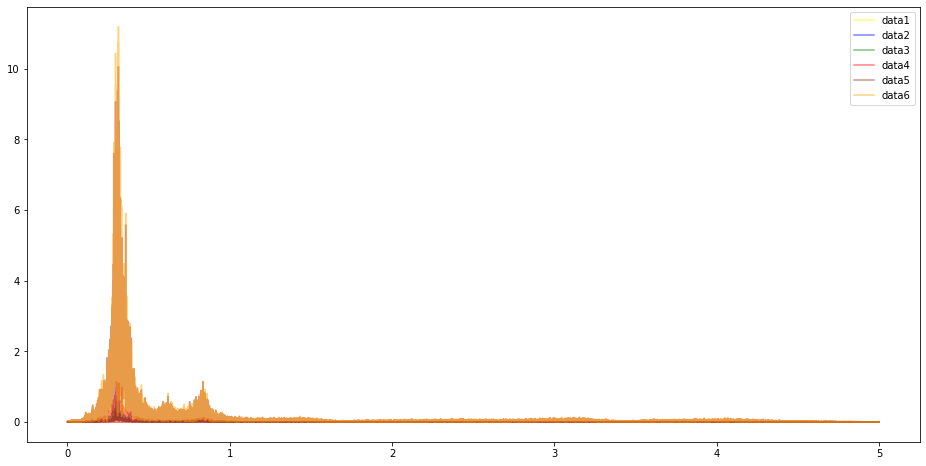

In [ ]:
plt.figure(figsize=(16,8))

data1 = plt.plot(freq,FFT,color='yellow', alpha=0.5)
data2 = plt.plot(freq1,FFT1,color='blue', alpha=0.5)
data3 = plt.plot(freq2,FFT2,color='green', alpha=0.5)
data4 = plt.plot(freq3,FFT3,color='red', alpha=0.5)
data5 = plt.plot(freq4,FFT4,color='brown', alpha=0.5)
data6 = plt.plot(freq5,FFT5,color='orange', alpha=0.5)

plt.legend(["data1", "data2", "data3", "data4", "data5", "data6"], loc ="upper right")

# Display NF

In [ ]:
#Display NF

#Dataset1
n = np.array(FFT)
nf = freq[np.argmax(n)]
print('nf1  : ', nf, 'Hz \n')
#Dataset2
n1 = np.array(FFT1)
nf1= freq1[np.argmax(n1)]
print('nf2  : ', nf1, 'Hz \n')
#Dataset3
n2 = np.array(FFT2)
nf2 = freq2[np.argmax(n2)]
print('nf3  : ', nf2, 'Hz \n')
#Dataset4
n3 = np.array(FFT3)
nf3= freq3[np.argmax(n3)]
print('nf4  : ', nf3, 'Hz \n')
#Dataset5
n4 = np.array(FFT4)
nf4 = freq4[np.argmax(n4)]
print('nf5  : ', nf4, 'Hz \n')
#Dataset6
n5 = np.array(FFT5)
nf5= freq5[np.argmax(n5)]
print('nf6  : ', nf5, 'Hz \n')

nf1  :  0.31333333333333335 Hz 

nf2  :  0.29500000000000004 Hz 

nf3  :  0.30277777777777776 Hz 

nf4  :  0.30277777777777776 Hz 

nf5  :  0.31424242424242427 Hz 

nf6  :  0.31444444444444447 Hz 

The maximum value is : 0.31444444444444447


# Save data to csv file

In [ ]:
import csv

with open('output.csv', 'w', newline='') as file:
    fieldnames = ['file_name', 'NF(Hz)', 'NP(s)']
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerow({'file_name': 'data1', 'NF(Hz)': nf, 'NP(s)': 1/nf})
    writer.writerow({'file_name': 'data2', 'NF(Hz)': nf1, 'NP(s)': 1/nf1})
    writer.writerow({'file_name': 'data3', 'NF(Hz)': nf2, 'NP(s)': 1/nf2})
    writer.writerow({'file_name': 'data4', 'NF(Hz)': nf3, 'NP(s)': 1/nf3})
    writer.writerow({'file_name': 'data5', 'NF(Hz)': nf4, 'NP(s)': 1/nf4})
    writer.writerow({'file_name': 'data6', 'NF(Hz)': nf5, 'NP(s)': 1/nf5})

data = pd.read_csv('output.csv')

# Print it out
print(data)

  file_name    NF(Hz)     NP(s)
0     data1  0.313333  3.191489
1     data2  0.295000  3.389831
2     data3  0.302778  3.302752
3     data4  0.302778  3.302752
4     data5  0.314242  3.182257
5     data6  0.314444  3.180212


# Display NF graph

The maximum value is : 0.3144444444444444 

No Value Exceed Threshold



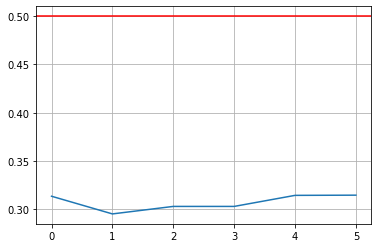

In [ ]:
data['NF(Hz)'].plot()

#Specifying the threshold for safety vibration

'''
NOTE:
The value can be change accordingly with type of elevator
Threshold 0.5 is refer from the Schindler elevators criterion
'''
plt.axhline(y = 0.5, color = 'r', linestyle = '-')

plt.grid()

# Determine the maximum value of NF
max_value = max(data['NF(Hz)'])
print('The maximum value is :', max_value, '\n')

#State if the maximum value excees threashold or not
if max_value<0.5:
  print('No Value Exceed Threshold\n')

else:
  print(max_value, ' Exceed Threshold\n')


# Display NP graph

The minimum value is : 3.180212014134276 

No Value Exceed Threshold



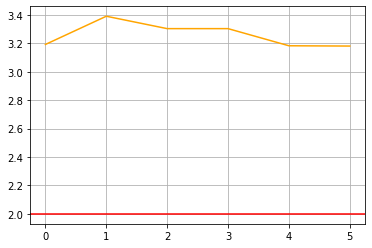

In [ ]:
data['NP(s)'].plot(color='orange')

# specifying the threshold for safety vibration
plt.axhline(y = 2, color = 'r', linestyle = '-')

plt.grid()

# Determine the minimum value of NP
min_value = min(data['NP(s)'])
print('The minimum value is :', min_value, '\n')

#State if the minimum value excees threashold or not
if min_value>2:
  print('No Value Exceed Threshold\n')

else:
  print(min_value, ' Exceed Threashold\n')